Exploratory data analysis 

In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


In [3]:
df=pd.read_csv('telecom_churn.csv')

df.head()


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


Plotting correlation among features 

In [6]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,1.000,0.017,-0.260,-0.102,-0.087,0.209,0.205,0.018,0.072,0.093,0.068
AccountWeeks,0.017,1.000,-0.025,0.003,0.014,-0.004,0.006,0.038,0.013,-0.007,0.010
ContractRenewal,-0.260,-0.025,1.000,-0.006,-0.019,0.025,-0.049,-0.004,-0.047,-0.019,-0.046
DataPlan,-0.102,0.003,-0.006,1.000,0.946,-0.018,-0.002,-0.011,0.737,0.022,-0.001
DataUsage,-0.087,0.014,-0.019,0.946,1.000,-0.022,0.003,-0.008,0.782,0.020,0.163
CustServCalls,0.209,-0.004,0.025,-0.018,-0.022,1.000,-0.013,-0.019,-0.028,-0.013,-0.010
DayMins,0.205,0.006,-0.049,-0.002,0.003,-0.013,1.000,0.007,0.568,0.007,-0.010
DayCalls,0.018,0.038,-0.004,-0.011,-0.008,-0.019,0.007,1.000,-0.008,-0.021,0.022
MonthlyCharge,0.072,0.013,-0.047,0.737,0.782,-0.028,0.568,-0.008,1.000,0.282,0.117
OverageFee,0.093,-0.007,-0.019,0.022,0.020,-0.013,0.007,-0.021,0.282,1.000,-0.011


In [7]:
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


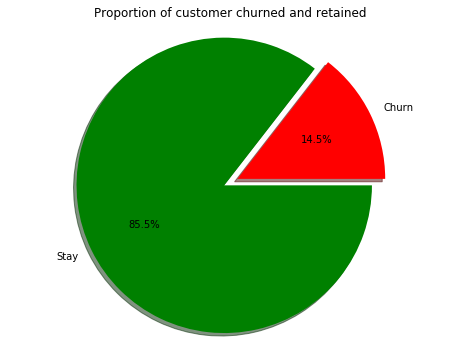

In [13]:
labels = 'Churn', "Stay"
sizes = [df.Churn[df['Churn'] == 1].count(), df.Churn[df['Churn'] == 0].count()]
explode = (0.1, 0)

fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True,colors=['red','green'])
ax1.axis('equal')

plt.title("Proportion of customer churned and retained")

plt.show()

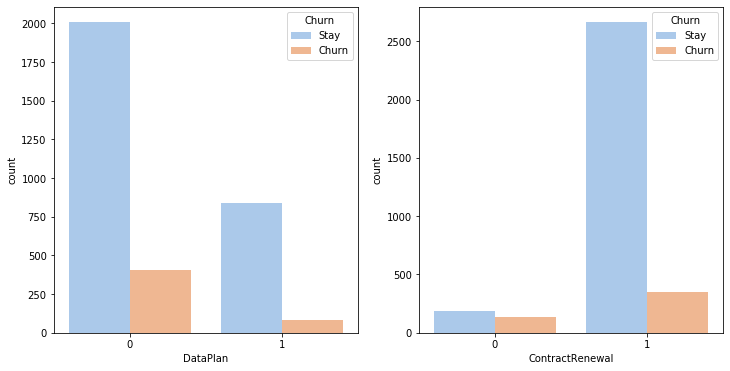

In [18]:
df_hue = df.copy()
df_hue["Churn"] = np.where(df_hue["Churn"] == 0, "Stay", "Churn")




fig, axarr = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='DataPlan', hue = 'Churn',data = df_hue, ax=axarr[0], palette="pastel")
sns.countplot(x='ContractRenewal', hue = 'Churn',data = df_hue, ax=axarr[1], palette="pastel")